# Analysis of the dataset
The python script **example_physionet.py** found in the downloaded dataset contains code to build the train and test sets from the raw data. The most relevant part of the code for the current challenge is the function that reads the ECG signal records in WaveForm DataBase format. The read operation is achieved with the function rdsamp from **wfdb** package. After a first look at the [documentation](https://wfdb.readthedocs.io/en/latest/) it seems that the packages offers all the necessary tools to complete several tasks of the challenge.  

# Reading ECG files
Let's inspect some of the available functions to read WFDB objects and their returned output.

In [1]:
import wfdb

TEST_SAMPLE_PATH = 'data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\00000\\00001_lr'

# Returns Record object
data_header = wfdb.rdheader(TEST_SAMPLE_PATH)
print(type(data_header))

# Returns Record object
data_record = wfdb.rdrecord(TEST_SAMPLE_PATH)
print(type(data_record))

# Returns a tuple containing a 2d numpy array storing the physical signals from the record and 
# a dictionary containing several key attributes of the read record
data_sample = wfdb.rdsamp(TEST_SAMPLE_PATH)
print(type(data_sample))
print(type(data_sample[0]))
print(type(data_sample[1]))

# Returns an Annotation object
data_ann = wfdb.rdann(TEST_SAMPLE_PATH, 'hea')
print(type(data_ann))


<class 'wfdb.io.record.Record'>
<class 'wfdb.io.record.Record'>
<class 'tuple'>
<class 'numpy.ndarray'>
<class 'dict'>
<class 'wfdb.io.annotation.Annotation'>


Apparently, only the **Record** object returned by wfdb.rdrecord contains the signal data. This data corresponds with the 2d array returned by data_sample. 

In [2]:
print(data_header.p_signal)
print(data_header.d_signal)
print(data_record.p_signal)
print(data_record.d_signal)
print(data_sample[0])
print(data_sample[1])

None
None
[[-0.119 -0.055  0.064 ... -0.026 -0.039 -0.079]
 [-0.116 -0.051  0.065 ... -0.031 -0.034 -0.074]
 [-0.12  -0.044  0.076 ... -0.028 -0.029 -0.069]
 ...
 [ 0.069  0.    -0.069 ...  0.024 -0.041 -0.058]
 [ 0.086  0.004 -0.081 ...  0.242 -0.046 -0.098]
 [ 0.022 -0.031 -0.054 ...  0.143 -0.035 -0.12 ]]
None
[[-0.119 -0.055  0.064 ... -0.026 -0.039 -0.079]
 [-0.116 -0.051  0.065 ... -0.031 -0.034 -0.074]
 [-0.12  -0.044  0.076 ... -0.028 -0.029 -0.069]
 ...
 [ 0.069  0.    -0.069 ...  0.024 -0.041 -0.058]
 [ 0.086  0.004 -0.081 ...  0.242 -0.046 -0.098]
 [ 0.022 -0.031 -0.054 ...  0.143 -0.035 -0.12 ]]
{'fs': 100, 'sig_len': 1000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}


# Obtain annotations from csv file
All the code necessary to obtain the anotations corresponding to the signals is found in the python script **example_physionet.py**, wich is provided in the downloaded dataset. In the code below, Y is a DataFrame that contains all the data in file ptbxl_database.csv.

In [5]:
import pandas as pd

path = 'data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/'

Y = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')
print(f'The number of rows in the data frame is {Y.shape[0]}')

The number of rows in the data frame is 21801


However, although the readme file says that there are 21837 records, in reality there are only 21801 records in the database. Therefore, the number of rows in the DataFrame matches the number of recorded signals in the database. The index of the last sample in the dataset has the number 21837, wich means that there are 36 missing recordings. 

In [6]:
import os 

path = 'data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/records100'

records = []
for (root, dirs, files) in os.walk(path):
    records.extend([file for file in files if '.dat' in file])

print(f'The number of different records in the database is {len(records)}')

The number of different records in the database is 21801


# Ploting the signal
The wfdb package provides three functions to plot the data.
- **wfdb.plot_all_records** plots all WFDB records in a directory (by finding header files), one at a time, until the ‘enter’ key is pressed
- **wfdb.plot_items** subplots individual channels of signals and/or annotations.
- **wfdb.plot_wfdb** plots all individual channels of a WFDB record and/or annotation.

I believe the last two functions are the most suitable for the visualization of the signals. 

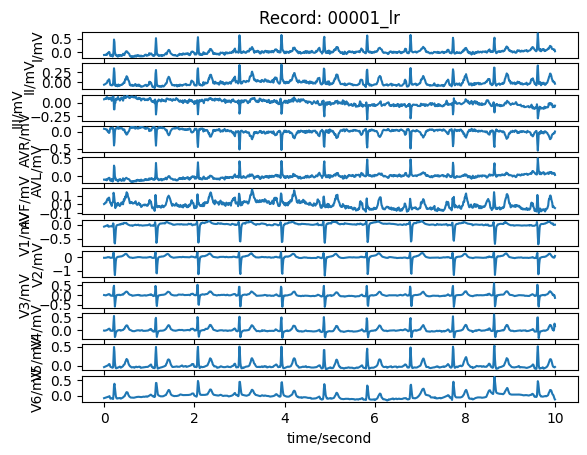

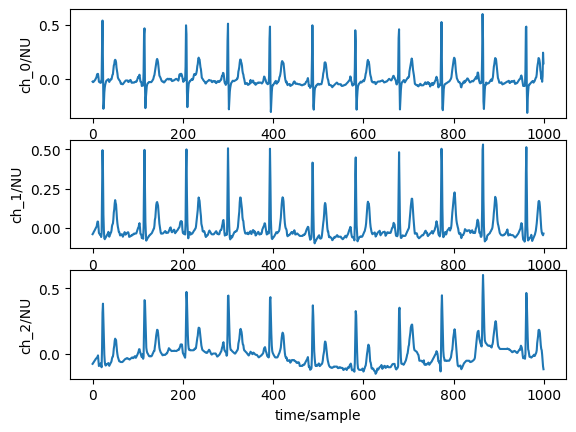

In [3]:
sample_path = 'data\\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\\records100\\00000\\00001_lr'

# Plot all signals in the Record, from Record object
sample_record = wfdb.rdrecord(sample_path)
wfdb.plot_wfdb(sample_record)
# Plot last three signals from np.array containing all the signals
sample_signal, sample_dict = wfdb.rdsamp(sample_path)
wfdb.plot_items(sample_signal[:, -3:])

Just as a check, the signals are plot with matplotlib. The resulting plot is exactly the same. 

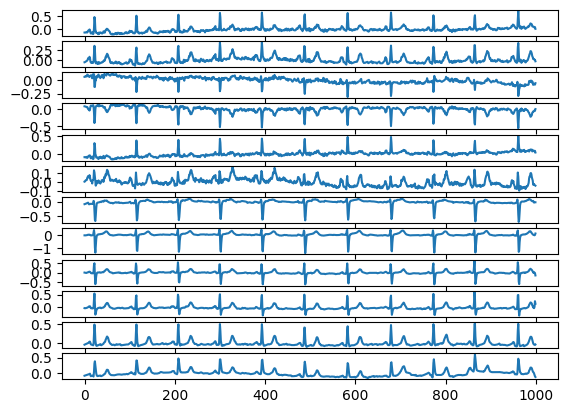

In [4]:
import matplotlib.pyplot as plt

sample_mat = data_sample[0]
fig, axes = plt.subplots(nrows=sample_mat.shape[1], ncols=1)
for i in range(sample_mat.shape[1]):
    axes[i].plot(sample_mat[:, i])
plt.show()

# Identifying the heart beat of the signal
wfdb package provides functions to identify the heart beats and compute average heart beat. But I don't have time to explore the documentation so I finish the challenge here. 